<a href="https://colab.research.google.com/github/anujsaxena/Python/blob/main/Yashi_kmeans_potato_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup Pyspark**

In [6]:
!pip install pyspark
# Spark SQL
!pip install pyspark[sql]
# pandas API on Spark
!pip install pyspark[pandas_on_spark] plotly  
!PYSPARK_HADOOP_VERSION=2.7 pip install pyspark'''

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
#call the required modules

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import cv2
import os
import matplotlib.image as mpimg
import tensorflow as tf
import random
from sklearn import preprocessing
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import pandas as pd
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

ValueError: ignored

In [9]:
#prepare dataset
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 50
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(
        directory = '/content/gdrive/MyDrive/Potato/Train/',  # this is the input directory
        target_size = (16, 16),  # all images will be resized to 64x64
        batch_size = 16,
        class_mode = 'categorical',
        color_mode="rgb")

Found 900 images belonging to 3 classes.


In [12]:
validation_generator = validation_datagen.flow_from_directory(
        directory = '/content/gdrive/MyDrive/Potato/Valid/',
        target_size = (16, 16),
        batch_size = 16,
        class_mode='categorical',
        color_mode="rgb")

Found 300 images belonging to 3 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
        directory = '/content/gdrive/MyDrive/Potato/Test/',
        target_size = (16, 16),
        batch_size = 16,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 300 images belonging to 3 classes.


In [16]:
import os
from google.colab.patches import cv2_imshow
data = []
label = []
path = '/content/gdrive/MyDrive/Potato/Test/'
c = 0
b=0
d = 0
IMG_SIZE = 16
for file in os.listdir(path):
    #print(file)
    fp=os.path.join(path,file)
    if file[9:]=='healthy':
        if c==300: 
          continue
        c+=1
       # label.append("healthy")
        label.append(0)
    elif file[9:]=='Late_blight':
        if b==300: 
          continue
        b+=1
        #label.append("Late_blight")
        label.append(1)
    else:
        if d==300: 
          continue
        d+=1
        #label.append("Early_blight")
        label.append(2)
    for fil in os.listdir(fp):
      #print(fil)
      potato= os.path.join(fp,fil)
      #print(potato)
      img=cv2.imread(potato, cv2.IMREAD_COLOR)
      img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      #cv2_imshow(img)
      #cv2.waitKey(0)
      data.append(img)
data = np.array(data)
cv2.destroyAllWindows()


In [17]:
print(label)

[0, 1, 2]


In [18]:
data = data/255.0
reshaped_data = data.reshape(len(data),-1)
print(reshaped_data)

[[0.63921569 0.61176471 0.69411765 ... 0.60392157 0.58431373 0.66666667]
 [0.74117647 0.70196078 0.75294118 ... 0.56078431 0.53333333 0.61568627]
 [0.63137255 0.59215686 0.65490196 ... 0.55294118 0.5254902  0.60784314]
 ...
 [0.69803922 0.64705882 0.65490196 ... 0.61176471 0.56078431 0.56862745]
 [0.84705882 0.84705882 0.87058824 ... 0.71764706 0.70196078 0.74509804]
 [0.7372549  0.68235294 0.69019608 ... 0.56470588 0.50980392 0.51764706]]


In [19]:
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

(2, 768)

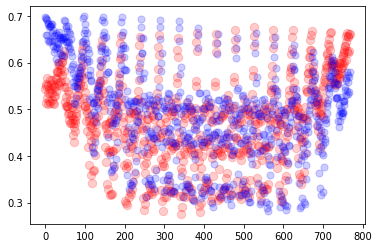

In [20]:
x_data = [i for i in range(768)]
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

In [21]:
print(reshaped_data.shape)
reshaped_data=pd.DataFrame(reshaped_data)


(300, 768)


In [22]:
labels=[]
for i in range(0,100):
  labels.append(0)
for i in range(0,100):
  labels.append(1)
for i in range(0,100):
  labels.append(2)
print(labels)
reshaped_data['label']=labels

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [23]:
print(reshaped_data)

            0         1         2         3         4         5         6  \
0    0.639216  0.611765  0.694118  0.643137  0.615686  0.698039  0.650980   
1    0.741176  0.701961  0.752941  0.662745  0.623529  0.674510  0.713725   
2    0.631373  0.592157  0.654902  0.588235  0.549020  0.611765  0.580392   
3    0.713725  0.682353  0.749020  0.709804  0.678431  0.745098  0.568627   
4    0.792157  0.768627  0.835294  0.705882  0.682353  0.749020  0.639216   
..        ...       ...       ...       ...       ...       ...       ...   
295  0.737255  0.658824  0.654902  0.654902  0.584314  0.580392  0.717647   
296  0.549020  0.498039  0.505882  0.592157  0.549020  0.560784  0.541176   
297  0.698039  0.647059  0.654902  0.729412  0.674510  0.690196  0.713725   
298  0.847059  0.847059  0.870588  0.823529  0.823529  0.847059  0.823529   
299  0.737255  0.682353  0.690196  0.768627  0.717647  0.725490  0.764706   

            7         8         9  ...       759       760       761  \
0  

In [24]:
df=reshaped_data
df.replace('', np.nan, inplace=True)
print(df)
df.dropna(inplace=True)


            0         1         2         3         4         5         6  \
0    0.639216  0.611765  0.694118  0.643137  0.615686  0.698039  0.650980   
1    0.741176  0.701961  0.752941  0.662745  0.623529  0.674510  0.713725   
2    0.631373  0.592157  0.654902  0.588235  0.549020  0.611765  0.580392   
3    0.713725  0.682353  0.749020  0.709804  0.678431  0.745098  0.568627   
4    0.792157  0.768627  0.835294  0.705882  0.682353  0.749020  0.639216   
..        ...       ...       ...       ...       ...       ...       ...   
295  0.737255  0.658824  0.654902  0.654902  0.584314  0.580392  0.717647   
296  0.549020  0.498039  0.505882  0.592157  0.549020  0.560784  0.541176   
297  0.698039  0.647059  0.654902  0.729412  0.674510  0.690196  0.713725   
298  0.847059  0.847059  0.870588  0.823529  0.823529  0.847059  0.823529   
299  0.737255  0.682353  0.690196  0.768627  0.717647  0.725490  0.764706   

            7         8         9  ...       759       760       761  \
0  

In [25]:
df.to_csv('/content/gdrive/MyDrive/Potato/potato.csv')
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Clustering using K-Means').getOrCreate()
data_potato=spark.read.csv('/content/gdrive/MyDrive/Potato/potato.csv', header=True, inferSchema=True)
data_potato.printSchema()
data_potato=data_potato.na.drop()

root
 |-- _c0: integer (nullable = true)
 |-- 0: double (nullable = true)
 |-- 1: double (nullable = true)
 |-- 2: double (nullable = true)
 |-- 3: double (nullable = true)
 |-- 4: double (nullable = true)
 |-- 5: double (nullable = true)
 |-- 6: double (nullable = true)
 |-- 7: double (nullable = true)
 |-- 8: double (nullable = true)
 |-- 9: double (nullable = true)
 |-- 10: double (nullable = true)
 |-- 11: double (nullable = true)
 |-- 12: double (nullable = true)
 |-- 13: double (nullable = true)
 |-- 14: double (nullable = true)
 |-- 15: double (nullable = true)
 |-- 16: double (nullable = true)
 |-- 17: double (nullable = true)
 |-- 18: double (nullable = true)
 |-- 19: double (nullable = true)
 |-- 20: double (nullable = true)
 |-- 21: double (nullable = true)
 |-- 22: double (nullable = true)
 |-- 23: double (nullable = true)
 |-- 24: double (nullable = true)
 |-- 25: double (nullable = true)
 |-- 26: double (nullable = true)
 |-- 27: double (nullable = true)
 |-- 28: double (

In [26]:
df=data_potato
df.columns

['_c0',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137'

# **PCA**

# **Kmeans**

In [27]:
from pyspark.ml.feature import VectorAssembler
data_potato.columns
assemble=VectorAssembler(inputCols=df.columns, outputCol='features')
assembled_data=assemble.transform(df)
assembled_data.show(2)
df2=assembled_data

+---+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------

In [29]:
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
df1=assembled_data
model = pca.fit(df1)
result = model.transform(df1).select("pcaFeatures")
result.show(truncate=False)

+--------------------------------------------------------------+
|pcaFeatures                                                   |
+--------------------------------------------------------------+
|[-0.0046229120892674475,-12.19086263876783,3.2862372674221696]|
|[-1.0094535660927362,-12.954875385375228,1.7674674730146027]  |
|[-2.0043414488563416,-10.133650175268926,3.739270402051278]   |
|[-3.003278795586943,-11.718863322520273,3.648182581156293]    |
|[-4.014468615623557,-13.34162299930827,1.9707816854417384]    |
|[-5.01337073348173,-12.750845083798046,3.8028709339343023]    |
|[-6.015673025640713,-12.264992205955696,4.815775330746212]    |
|[-6.99866775467144,-13.193048776585503,1.5520065839634416]    |
|[-8.00910364346557,-13.433031151215603,1.546739370187543]     |
|[-9.006220901935423,-11.098952671903572,1.727128255097457]    |
|[-10.007918926096849,-9.938324376883212,0.2753788509600351]   |
|[-11.001068444602414,-11.578982174745462,2.279263303723642]   |
|[-12.00423762305103,-11.

In [31]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='pcaFeatures',outputCol='standardized')
assembled_data=result
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)
data_scale_output.show(4)

+--------------------+--------------------+
|         pcaFeatures|        standardized|
+--------------------+--------------------+
|[-0.0046229120892...|[-5.3287955980626...|
|[-1.0094535660927...|[-0.0116358944655...|
|[-2.0043414488563...|[-0.0231038914074...|
|[-3.0032787955869...|[-0.0346185662124...|
+--------------------+--------------------+
only showing top 4 rows



In [32]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)

    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.3769622652245716
Silhouette Score: 0.4427125629333764
Silhouette Score: 0.47857222141209327
Silhouette Score: 0.4556580195635196
Silhouette Score: 0.4651364366743374
Silhouette Score: 0.4526700903635031
Silhouette Score: 0.45007733773118114
Silhouette Score: 0.4013667489490179


Text(0, 0.5, 'cost')

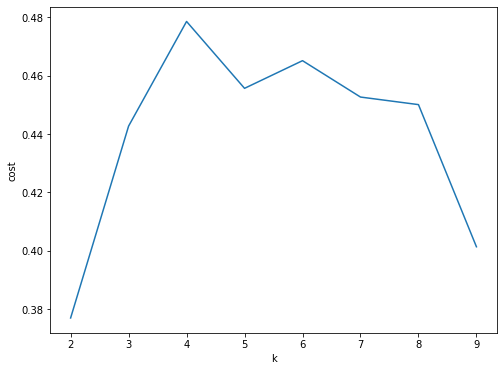

In [33]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

# **PCA**

In [34]:
model.getK()

3

In [37]:
print("====Eigenvector====")
print(model.pc)

print("====Contribution rate====")
print(model.explainedVariance)

====Eigenvector====
DenseMatrix([[-9.99923275e-01,  1.28538444e-03, -1.04298418e-03],
             [-1.03744533e-04, -4.63226975e-02, -3.79601212e-02],
             [-1.15146614e-05, -4.64841091e-02, -3.55083115e-02],
             ...,
             [-1.90403849e-04, -3.72501200e-03,  3.86015448e-02],
             [ 5.71562735e-05, -3.33889176e-03,  3.50451208e-02],
             [-8.88845656e-03,  1.36007697e-04, -8.19405700e-04]])
====Contribution rate====
[0.9972180525814874,0.000323730248042153,0.00027131869726996577]
